In [6]:
# Import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
from sqlalchemy import create_engine

In [12]:
# Engine
sqlalchemy_engine = create_engine('mssql+pyodbc://@APELSINAS77\\DEVSERVER/Apelsinas?driver=ODBC+Driver+18+for+SQL+Server&Trusted_Connection=yes&TrustServerCertificate=yes')

In [17]:
# Read the data
table_name = 'COVID19_vacines'
query = f"SELECT * FROM {table_name}"
vac_df = pd.read_sql(query, sqlalchemy_engine)

table_name = 'COVID19_case_death'
query = f"SELECT * FROM {table_name}"
cases_df = pd.read_sql(query, sqlalchemy_engine)

table_name = 'COVID19_hospitals'
query = f"SELECT * FROM {table_name}"
hospitals_df = pd.read_sql(query, sqlalchemy_engine)

In [47]:
# Check for nulls
mv = vac_df.isnull().sum()
print(mv[mv > 0])

Series([], dtype: int64)


In [36]:
# Drop nulls
vac_df = vac_df.dropna()

In [37]:
vac_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4571504 entries, 0 to 4573156
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   object_id          int64  
 1   pseudo_id          object 
 2   birth_year_noisy   float64
 3   sex                object 
 4   muni_declared      object 
 5   muni_policlin      object 
 6   vaccination_date   object 
 7   dose_number        int64  
 8   drug_manufacturer  object 
 9   drug_name_common   object 
 10  vacc_org_name      object 
 11  vacc_org_muni      object 
dtypes: float64(1), int64(2), object(9)
memory usage: 453.4+ MB


In [39]:
mv = cases_df.isnull().sum()
print(mv[mv > 0])

Series([], dtype: int64)


In [43]:
mv = hospitals_df.isnull().sum()
print(mv[mv > 0])

Series([], dtype: int64)


In [42]:
hospitals_df = hospitals_df.dropna()

In [44]:
hospitals_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32922 entries, 0 to 32942
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   X                                32922 non-null  float64
 1   Y                                32922 non-null  float64
 2   object_id                        32922 non-null  int64  
 3   date                             32922 non-null  object 
 4   hospital_name                    32922 non-null  object 
 5   healthcare_region                32922 non-null  object 
 6   hospital_beds_total_r7mean       32922 non-null  int64  
 7   hospital_beds_occupied_r7mean    32922 non-null  int64  
 8   oxygen_beds_total_r7mean         32922 non-null  int64  
 9   oxygen_beds_occupied_r7mean      32922 non-null  int64  
 10  mv_beds_total_r7mean             32922 non-null  int64  
 11  mv_beds_occupied_r7mean          32922 non-null  int64  
 12  icu_beds_total_r7mean  

In [51]:
print(vac_df.dtypes)

object_id                          int64
pseudo_id                         object
birth_year_noisy                   int32
sex                               object
muni_declared                     object
muni_policlin                     object
vaccination_date     datetime64[ns, UTC]
dose_number                        int64
drug_manufacturer                 object
drug_name_common                  object
vacc_org_name                     object
vacc_org_muni                     object
dtype: object


In [48]:
# Convert year to int
vac_df['birth_year_noisy'] = vac_df['birth_year_noisy'].astype(int)

In [50]:
# Convert vaccination date to datetime
vac_df['vaccination_date'] = pd.to_datetime(vac_df['vaccination_date'])

In [57]:
vac_df.head()

,object_id,pseudo_id,birth_year_noisy,sex,muni_declared,muni_policlin,vaccination_date,dose_number,drug_manufacturer,drug_name_common,vacc_org_name,vacc_org_muni
0,1,35DC7E4C89D,2001,M,Vilniaus m. sav.,Vilniaus m. sav.,2021-09-17 00:00:00+00:00,1,Pfizer-BioNTech,Comirnaty,Viešoji istaiga Karoliniškiu poliklinika,Vilniaus m. sav.
1,2,35DC7E4C89D,2001,M,Vilniaus m. sav.,Vilniaus m. sav.,2021-10-08 00:00:00+00:00,2,Pfizer-BioNTech,Comirnaty,Viešoji istaiga Karoliniškiu poliklinika,Vilniaus m. sav.
2,3,3AD852E6A7B,1990,M,Vilniaus m. sav.,Vilniaus m. sav.,2021-06-25 00:00:00+00:00,1,Johnson & Johnson,Janssen,Viešoji istaiga Nacionalinis kraujo centras,Vilniaus m. sav.
3,4,62E240BEFD1,1974,M,Vilniaus m. sav.,Vilniaus m. sav.,2021-08-20 00:00:00+00:00,1,Pfizer-BioNTech,Comirnaty,Viešoji istaiga Karoliniškiu poliklinika,Vilniaus m. sav.
4,5,62E240BEFD1,1974,M,Vilniaus m. sav.,Vilniaus m. sav.,2021-09-10 00:00:00+00:00,2,Pfizer-BioNTech,Comirnaty,Viešoji istaiga Karoliniškiu poliklinika,Vilniaus m. sav.


In [55]:
print(cases_df.dtypes)

object_id                          int64
municipality_name                 object
date                 datetime64[ns, UTC]
sex                               object
age_gr                            object
incidence                          int64
infection_1                        int64
infection_2                        int64
infection_3                        int64
infection_4                        int64
deaths_all                         int64
deaths_cov1                        int64
deaths_cov2                        int64
deaths_cov3                        int64
dtype: object


In [54]:
# Convert vaccination date to datetime
cases_df['date'] = pd.to_datetime(cases_df['date'])

In [56]:
cases_df.head()

,object_id,municipality_name,date,sex,age_gr,incidence,infection_1,infection_2,infection_3,infection_4,deaths_all,deaths_cov1,deaths_cov2,deaths_cov3
0,1,Taurages r. sav.,2020-02-01 00:00:00+00:00,Moteris,60-69,0,0,0,0,0,1,0,0,0
1,2,Kalvarijos sav.,2020-02-01 00:00:00+00:00,Moteris,70-79,0,0,0,0,0,1,0,0,0
2,3,Vilniaus m. sav.,2020-02-01 00:00:00+00:00,Moteris,80-89,0,0,0,0,0,2,0,0,0
3,4,Kauno m. sav.,2020-02-01 00:00:00+00:00,Moteris,80-89,0,0,0,0,0,2,0,0,0
4,5,Akmenes r. sav.,2020-02-01 00:00:00+00:00,Moteris,80-89,0,0,0,0,0,1,0,0,0


In [60]:
print(hospitals_df.dtypes)

X                                         float64
Y                                         float64
object_id                                   int64
date                               datetime64[ns]
hospital_name                              object
healthcare_region                          object
hospital_beds_total_r7mean                  int64
hospital_beds_occupied_r7mean               int64
oxygen_beds_total_r7mean                    int64
oxygen_beds_occupied_r7mean                 int64
mv_beds_total_r7mean                        int64
mv_beds_occupied_r7mean                     int64
icu_beds_total_r7mean                       int64
icu_beds_occupied_r7mean                    int64
icu_ecmo_systems_total_r7mean             float64
icu_ecmo_systems_in_use_r7mean            float64
cv19_hospital_beds_assigned_r7m           float64
cv19_hospital_beds_occupied_r7m             int64
cv19_oxygen_beds_assigned_r7mea           float64
cv19_oxygen_beds_occupied_r7mea             int64


In [59]:
# Convert vaccination date to datetime
hospitals_df['date'] = pd.to_datetime(hospitals_df['date'])

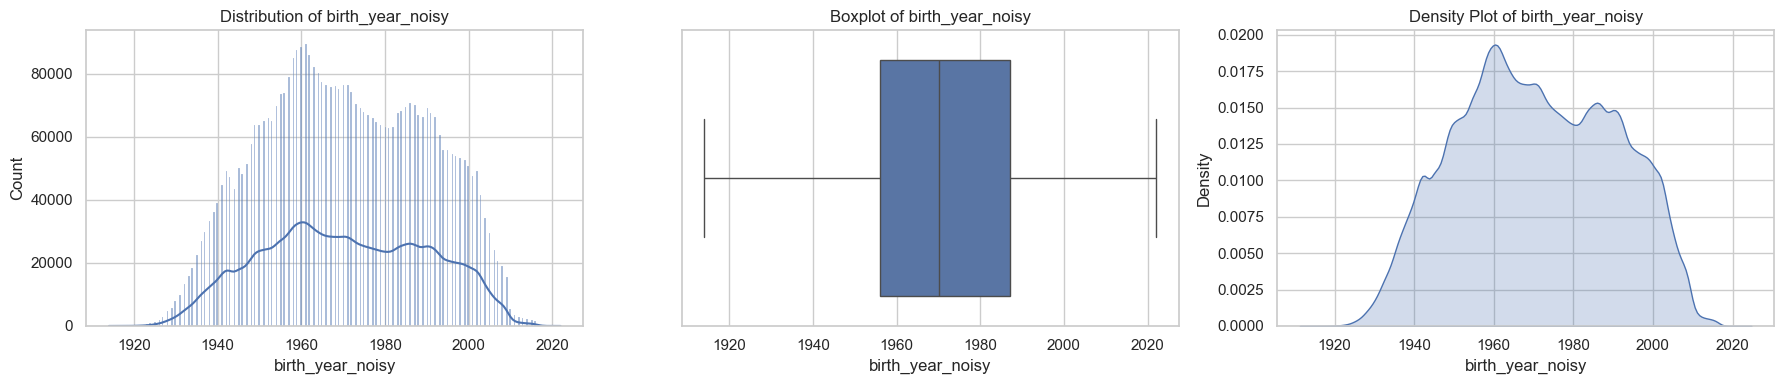

In [76]:
col = 'birth_year_noisy'

# Set up the matplotlib figure with multiple subplots using seaborn's style
sns.set(style="whitegrid")

# Create a figure for the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Histogram with a Kernel Density Estimate (KDE) on the first subplot
sns.histplot(vac_df[col], kde=True, ax=axes[0])
axes[0].set_title(f'Distribution of {col}')

# Boxplot on the second subplot
sns.boxplot(x=vac_df[col], ax=axes[1])
axes[1].set_title(f'Boxplot of {col}')

# KDE plot on the third subplot
sns.kdeplot(vac_df[col], fill=True, ax=axes[2])
axes[2].set_title(f'Density Plot of {col}')

# Display the plots
plt.tight_layout()
plt.show()


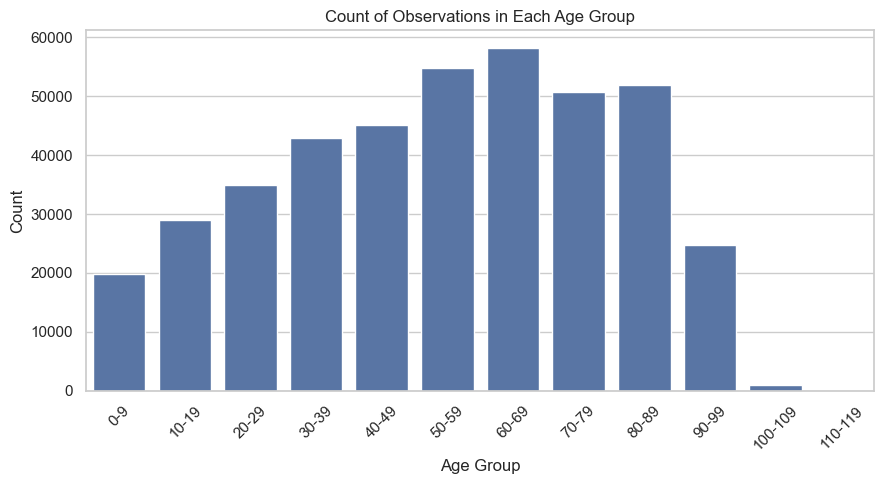

In [94]:
# Sorting the 'age_group' categories by the starting age
cases_df_filtered = cases_df[cases_df['age_gr'] != 'Nenustatyta']
age_group_sorted = sorted(cases_df_filtered['age_gr'].unique(), key=lambda x: int(x.split('-')[0]))

# Count plot for the 'age_group' column with sorted order
plt.figure(figsize=(9, 5))
sns.countplot(x='age_gr', data=cases_df_filtered, order=age_group_sorted)
plt.title('Count of Observations in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotates the labels to prevent overlap
plt.tight_layout()
plt.show()


In [102]:
c = hospitals_df.head(100)

In [103]:
c.to_csv('hospitals.csv')

In [104]:
# Convert the timezone-aware 'date' column in cases_deaths_df to timezone-naive
cases_df['date'] = cases_df['date'].dt.tz_localize(None)

# Convert the timezone-aware 'vaccination_date' column in vaccines_df to timezone-naive
vac_df['vaccination_date'] = vac_df['vaccination_date'].dt.tz_localize(None)

# Aggregate cases and deaths by date from the cases_deaths dataset
cases_deaths_aggregated = cases_df.groupby('date').agg(
    total_cases=pd.NamedAgg(column='incidence', aggfunc='sum'),
    total_deaths=pd.NamedAgg(column='deaths_all', aggfunc='sum')
).reset_index()

# Aggregate vaccination data by date from the vaccines dataset
vaccines_aggregated = vac_df.groupby(['vaccination_date', 'dose_number']).size().reset_index(name='vaccinations')

# Pivot the vaccination data to have separate columns for each dose number
vaccines_pivot = vaccines_aggregated.pivot_table(
    index='vaccination_date', 
    columns='dose_number', 
    values='vaccinations', 
    fill_value=0
).reset_index().rename_axis(None, axis=1)

# Merge the cases/deaths data with the vaccination pivot table
combined_data = pd.merge(
    cases_deaths_aggregated, 
    vaccines_pivot, 
    how='outer', 
    left_on='date', 
    right_on='vaccination_date'
).fillna(0)

# Remove the redundant 'vaccination_date' column after merging
combined_data.drop('vaccination_date', axis=1, inplace=True)

# Convert all date values to Timestamps, if there are any inconsistencies
combined_data['date'] = pd.to_datetime(combined_data['date'], errors='coerce')

# Sort the combined data by date
combined_data.sort_values('date', inplace=True)

In [105]:
combined_data.head()

,date,total_cases,total_deaths,1,2,3,4,5
0,2020-02-01,0,92,0.0,0.0,0.0,0.0,0.0
1,2020-02-02,0,102,0.0,0.0,0.0,0.0,0.0
2,2020-02-03,0,103,0.0,0.0,0.0,0.0,0.0
3,2020-02-04,0,116,0.0,0.0,0.0,0.0,0.0
4,2020-02-05,0,114,0.0,0.0,0.0,0.0,0.0


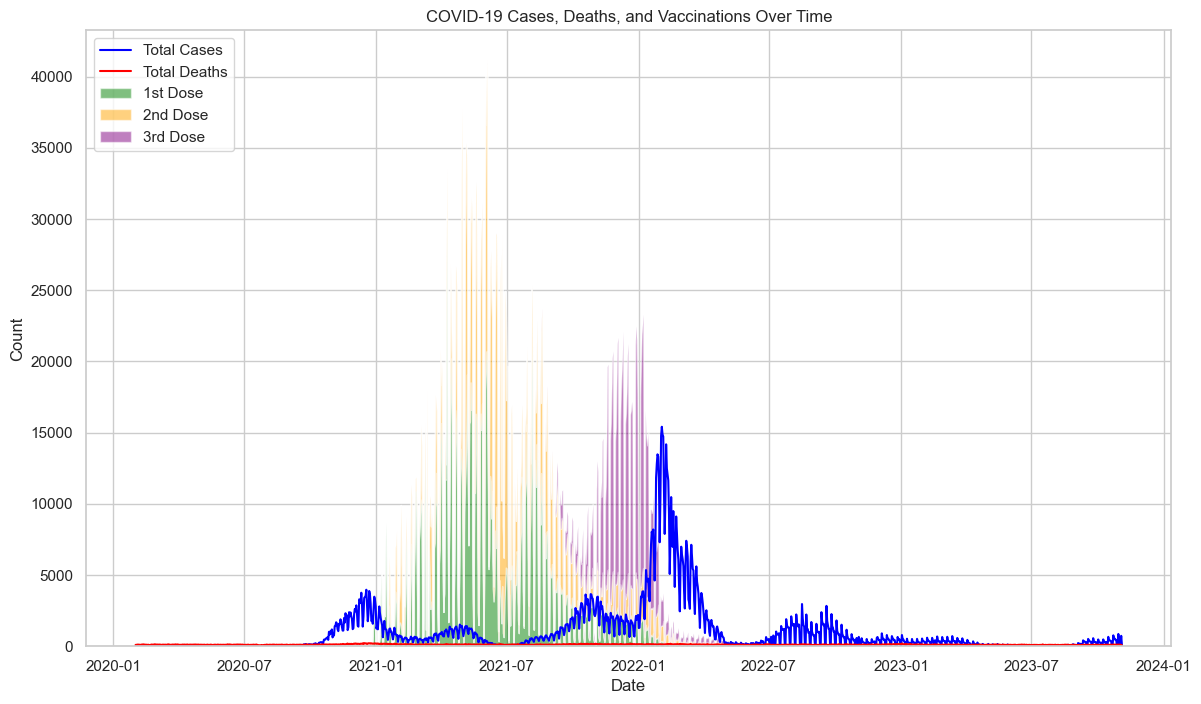

In [107]:
# Set the style for the plots
sns.set_style("whitegrid")

# Create the figure and axes for the plot
plt.figure(figsize=(14, 8))

# Plot the total cases and total deaths
plt.plot(combined_data['date'], combined_data['total_cases'], label='Total Cases', color='blue')
plt.plot(combined_data['date'], combined_data['total_deaths'], label='Total Deaths', color='red')

# Plot the vaccination data as stacked area plot
plt.stackplot(combined_data['date'], 
              [combined_data[1], combined_data[2], combined_data[3]],
              labels=['1st Dose', '2nd Dose', '3rd Dose'],
              colors=['green', 'orange', 'purple'], alpha=0.5)

# Add titles and labels
plt.title('COVID-19 Cases, Deaths, and Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Count')

# Improve the legend
plt.legend(loc='upper left')

# Show the plot
plt.show()


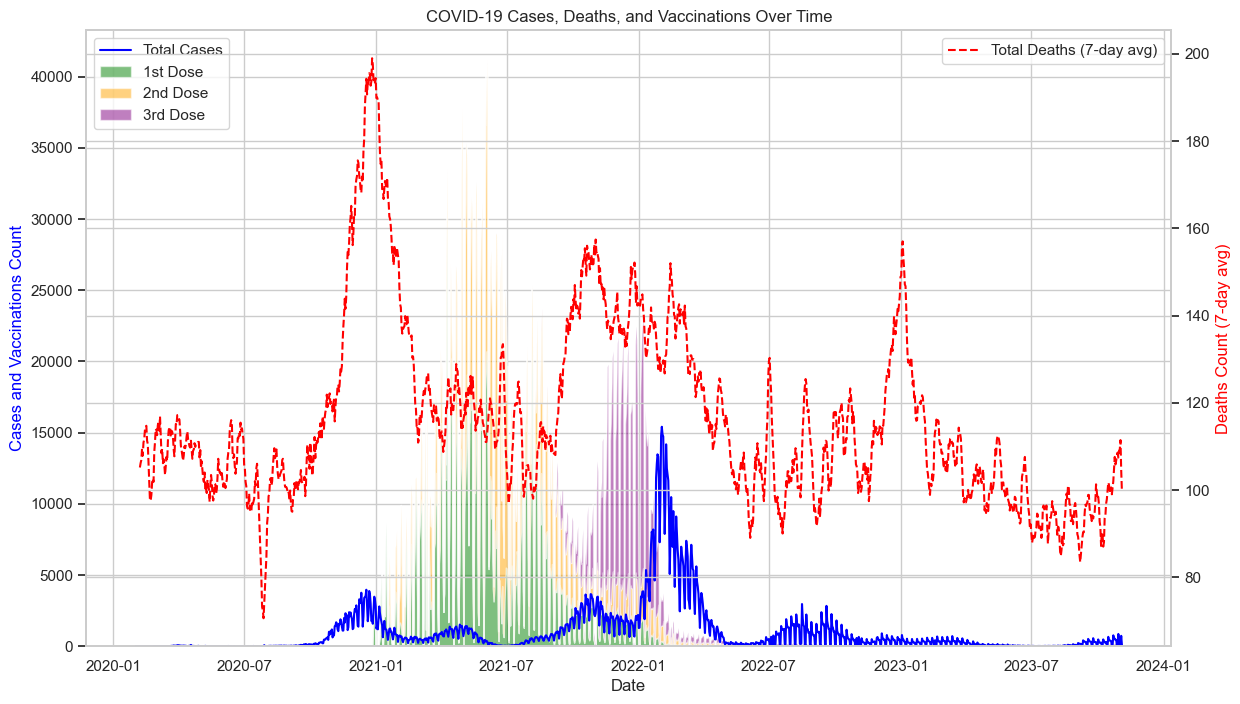

In [108]:
# Apply a 7-day rolling average to the deaths count for smoothing
combined_data['total_deaths_rolling_avg'] = combined_data['total_deaths'].rolling(window=7).mean()

# Create the figure and axes for the plot again
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot the total cases and vaccinations on the primary y-axis
ax1.plot(combined_data['date'], combined_data['total_cases'], label='Total Cases', color='blue')
ax1.stackplot(combined_data['date'], 
              [combined_data[1], combined_data[2], combined_data[3]],
              labels=['1st Dose', '2nd Dose', '3rd Dose'],
              colors=['green', 'orange', 'purple'], alpha=0.5)

# Create a secondary y-axis for total deaths using the rolling average
ax2 = ax1.twinx()
ax2.plot(combined_data['date'], combined_data['total_deaths_rolling_avg'], label='Total Deaths (7-day avg)', color='red', linestyle='--')

# Add titles and labels
plt.title('COVID-19 Cases, Deaths, and Vaccinations Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cases and Vaccinations Count', color='blue')
ax2.set_ylabel('Deaths Count (7-day avg)', color='red')

# Set the legend for the first y-axis
ax1.legend(loc='upper left')

# Set the legend for the second y-axis
ax2.legend(loc='upper right')

# Show the plot
plt.show()


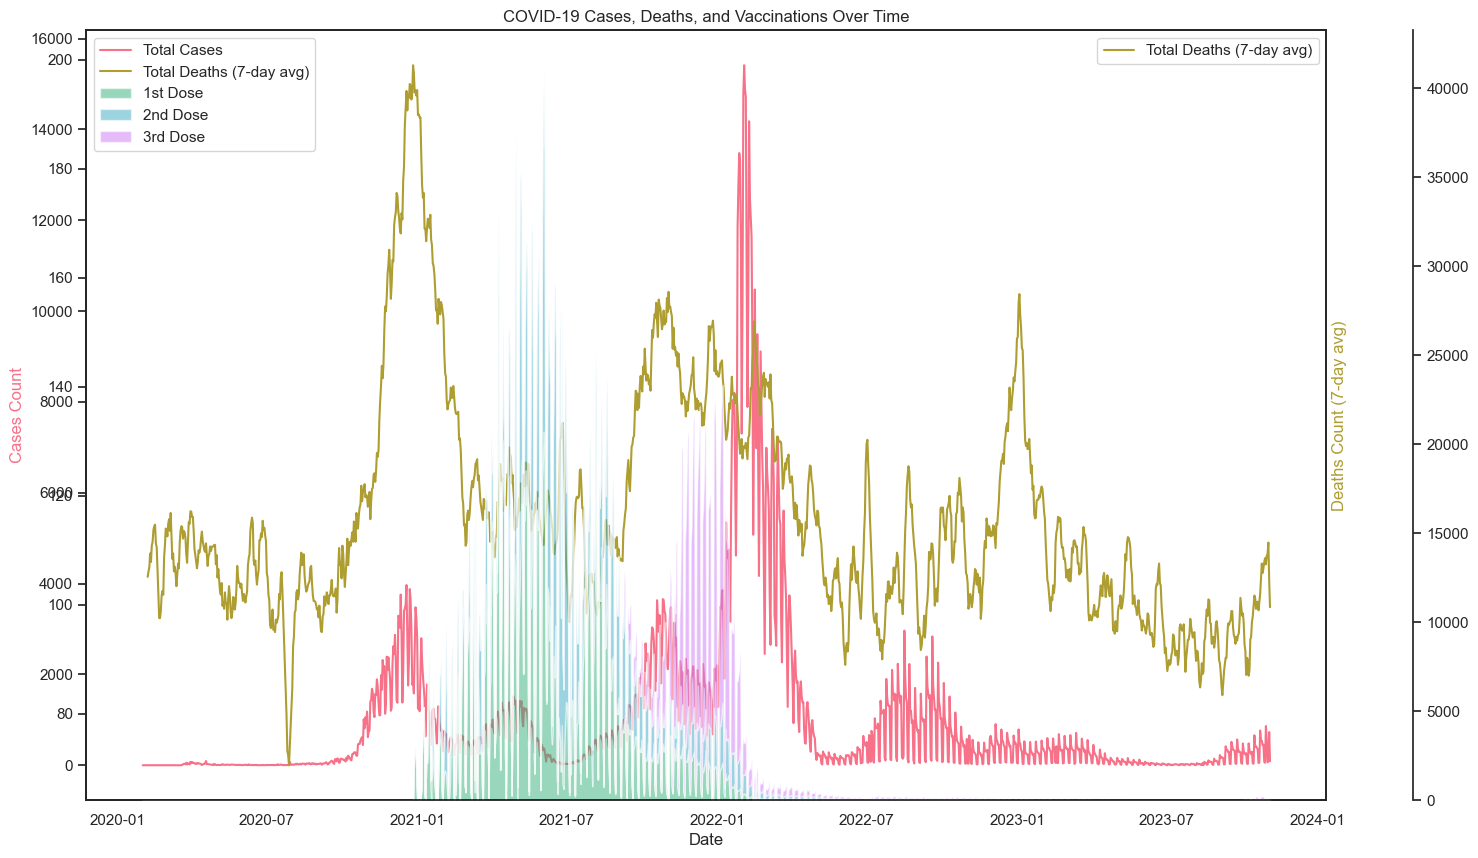

In [112]:
# Set the overall figure size and remove the grid
sns.set(style="white")
plt.figure(figsize=(16, 10))

# Create a color palette
palette = sns.color_palette("husl", 5)

# Subplot for Total Cases and Deaths
ax1 = sns.lineplot(x='date', y='total_cases', data=combined_data, color=palette[0], label='Total Cases')
ax2 = plt.twinx()
sns.lineplot(x='date', y='total_deaths_rolling_avg', data=combined_data, color=palette[1], label='Total Deaths (7-day avg)', ax=ax2)

# Create a secondary y-axis for total vaccinations
ax3 = plt.twinx()
ax3.spines["right"].set_position(("axes", 1.07))  # Offset the right spine of ax3
# Stackplot for vaccinations
ax3.stackplot(combined_data['date'], 
              [combined_data[1], combined_data[2], combined_data[3]],
              labels=['1st Dose', '2nd Dose', '3rd Dose'],
              colors=palette[2:], alpha=0.5)

# Add titles and labels
plt.title('COVID-19 Cases, Deaths, and Vaccinations Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cases Count', color=palette[0])
ax2.set_ylabel('Deaths Count (7-day avg)', color=palette[1])

# Legend for the first y-axis (Cases)
h1, l1 = ax1.get_legend_handles_labels()
# Legend for the second y-axis (Deaths)
h2, l2 = ax2.get_legend_handles_labels()
# Legend for the third y-axis (Vaccinations)
h3, l3 = ax3.get_legend_handles_labels()

ax1.legend(h1+h2+h3, l1+l2+l3, loc='upper left')

# Remove grid lines
ax1.grid(False)
ax2.grid(False)
ax3.grid(False)

plt.show()


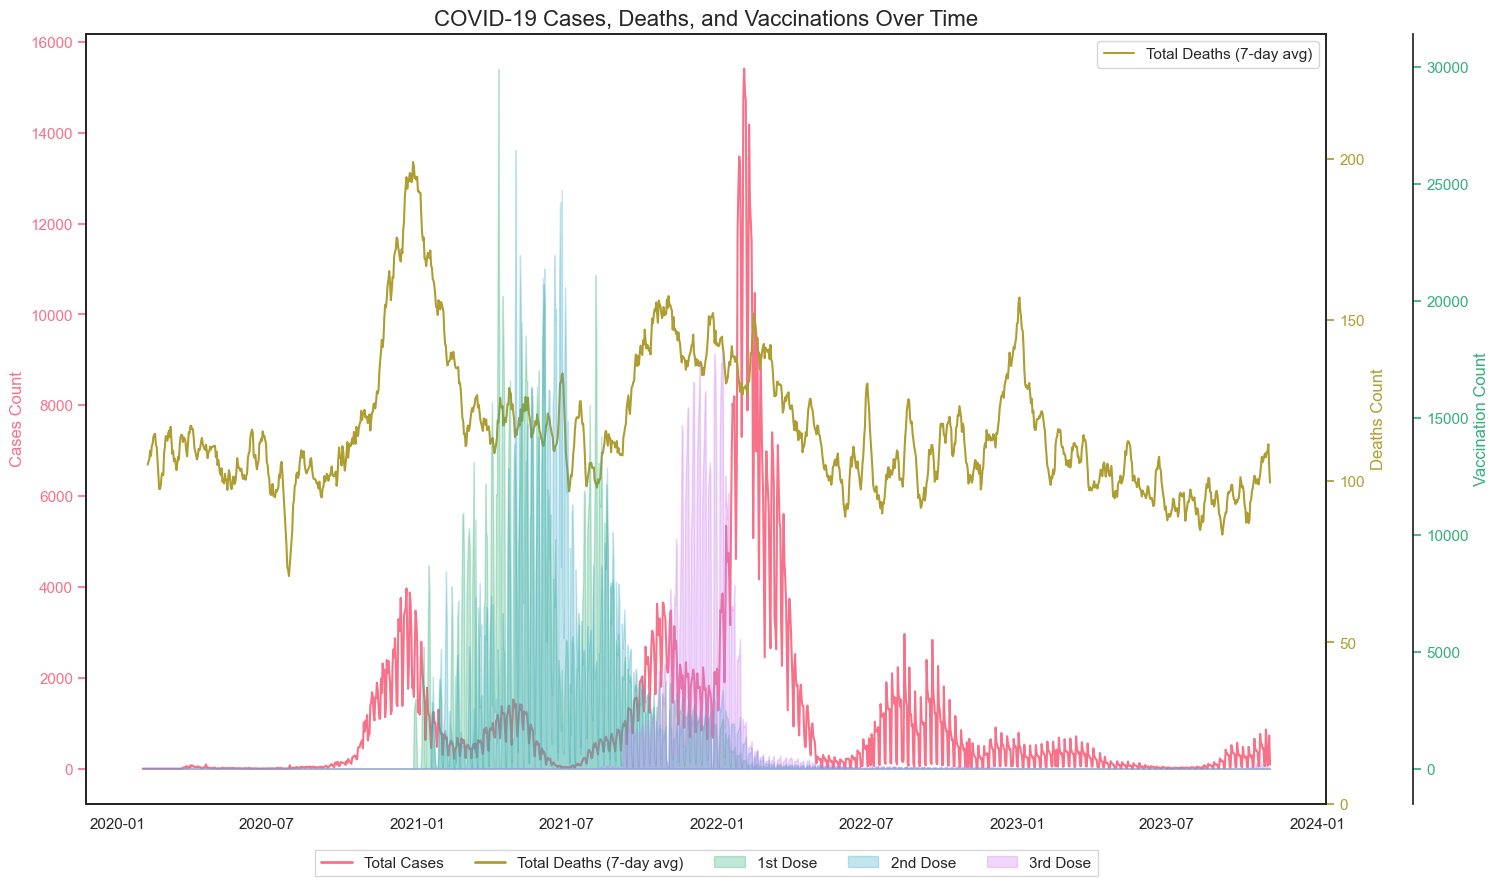

In [115]:
# Set the overall figure size and style
sns.set(style="white")
plt.figure(figsize=(16, 10))

# Create a color palette
palette = sns.color_palette("husl", 5)

# Plot for Total Cases
ax_cases = sns.lineplot(x='date', y='total_cases', data=combined_data, color=palette[0], label='Total Cases')
ax_cases.set_xlabel(None)
ax_cases.set_ylabel('Cases Count', color=palette[0])
ax_cases.tick_params(axis='y', colors=palette[0])

# Secondary y-axis for Total Deaths with correct scaling
ax_deaths = ax_cases.twinx()
sns.lineplot(x='date', y='total_deaths_rolling_avg', data=combined_data, color=palette[1], label='Total Deaths (7-day avg)', ax=ax_deaths)
ax_deaths.set_ylabel('Deaths Count', color=palette[1])
ax_deaths.tick_params(axis='y', colors=palette[1])

# Third y-axis for Vaccinations with correct scaling
ax_vaccinations = ax_cases.twinx()
# Offset the right spine of ax_vaccinations
ax_vaccinations.spines["right"].set_position(("axes", 1.07))
ax_vaccinations.set_ylabel('Vaccination Count', color=palette[2])
ax_vaccinations.tick_params(axis='y', colors=palette[2])

# Plot the vaccinations as a filled area on the third y-axis
ax_vaccinations.fill_between(combined_data['date'], combined_data[1], color=palette[2], alpha=0.3, label='1st Dose')
ax_vaccinations.fill_between(combined_data['date'], combined_data[2], color=palette[3], alpha=0.3, label='2nd Dose')
ax_vaccinations.fill_between(combined_data['date'], combined_data[3], color=palette[4], alpha=0.3, label='3rd Dose')

# Add titles and labels
plt.title('COVID-19 Cases, Deaths, and Vaccinations Over Time', fontsize=16)

# Create custom legends
cases_line = plt.Line2D([0], [0], color=palette[0], lw=2)
deaths_line = plt.Line2D([0], [0], color=palette[1], lw=2)
first_dose_patch = plt.Rectangle((0, 0), 1, 1, color=palette[2], alpha=0.3)
second_dose_patch = plt.Rectangle((0, 0), 1, 1, color=palette[3], alpha=0.3)
third_dose_patch = plt.Rectangle((0, 0), 1, 1, color=palette[4], alpha=0.3)

# Place a legend above the chart, with no frame, for a cleaner appearance
ax_cases.legend([cases_line, deaths_line, first_dose_patch, second_dose_patch, third_dose_patch],
           ['Total Cases', 'Total Deaths (7-day avg)', '1st Dose', '2nd Dose', '3rd Dose'],
           loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=False, shadow=False, ncol=5)

# Remove grid lines
ax_cases.grid(False)
ax_deaths.grid(False)
ax_vaccinations.grid(False)

# Adjust the y-axis limits for deaths to avoid the line being at the bottom
max_deaths = combined_data['total_deaths_rolling_avg'].max()
ax_deaths.set_ylim(0, max_deaths * 1.2)  # Add some padding to the max value

# Show the plot
plt.show()
